In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/big-mac-pricing-index'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/big-mac-pricing-index/big_mac.xlsx


In [2]:
# 
import numpy as np # numerical python
import pandas as pd # pannel datasets
import matplotlib.pyplot as plt # visualization
import seaborn as sns # visualization

In [8]:
import pandas as pd

# Load the dataset
df = pd.read_excel('/kaggle/input/big-mac-pricing-index/big_mac.xlsx')

In [9]:
df.head()

,big_mac_price,hourly_wages_usd
0,1.42,1.70
1,1.86,7.80
2,1.48,2.05
3,3.14,12.30
4,2.21,9.35


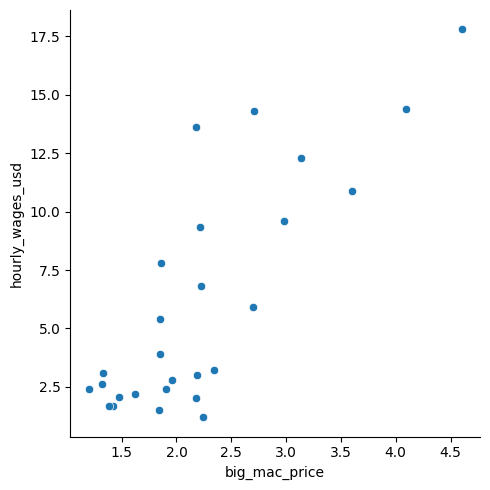

In [10]:
# scatter
sns.relplot(x='big_mac_price',y='hourly_wages_usd',data=df)
plt.show()

Linear Regression Analysis

In [11]:
import statsmodels.api as sm

In [14]:
# OLS
model = sm.OLS.from_formula('hourly_wages_usd ~ big_mac_price',data=df).fit()

Ordinary Least Squares (OLS) regression using statsmodels, where hourly_wages_usd is the dependent variable (the outcome) and big_mac_price is the independent variable (the predictor)

In [15]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       hourly_wages_usd   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     48.88
Date:                Tue, 11 Feb 2025   Prob (F-statistic):           2.50e-07
Time:                        00:24:47   Log-Likelihood:                -66.251
No. Observations:                  27   AIC:                             136.5
Df Residuals:                      25   BIC:                             139.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -4.5397      1.619     -2.805

In [17]:
# fitted values
net_hourly_wages_pred = -4.5397 + 4.7435 * df['big_mac_price']

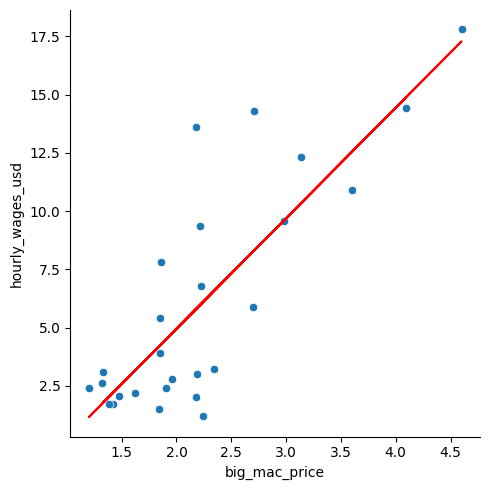

In [18]:
# scatter
sns.relplot(x='big_mac_price',y='hourly_wages_usd',data=df)
plt.plot(df['big_mac_price'],net_hourly_wages_pred,'r-')
plt.show()

In [19]:
# correlation (r)
df.corr()

,big_mac_price,hourly_wages_usd
big_mac_price,1.000000,0.813396
hourly_wages_usd,0.813396,1.000000


In [20]:
import numpy as np

# Calculate the mean of actual net hourly wages
mean_actual_wages = df['hourly_wages_usd'].mean()

# SSR: Sum of Squares for Regression
# Predicted values: net_hourly_wages_pred
SSR = np.sum(np.square(net_hourly_wages_pred - mean_actual_wages))

# SSE: Sum of Squares for Error
SSE = np.sum(np.square(net_hourly_wages_pred - df['hourly_wages_usd'].values))

# Print the results
print(f"SSR (Sum of Squares for Regression): {SSR}")
print(f"SSE (Sum of Squares for Error): {SSE}")


SSR (Sum of Squares for Regression): 418.181724263375
SSE (Sum of Squares for Error): 213.88429646337502


In [21]:
TSS = np.sum(np.square(df['hourly_wages_usd'].values - mean_actual_wages))
print(f"TSS (Total Sum of Squares): {TSS}")


TSS (Total Sum of Squares): 632.0708000000001


In [22]:
R_squared = 1 - (SSE / TSS)
print(f"R-squared: {R_squared}")


R-squared: 0.6616133881467472


The R² value of 0.6616 tells us that 66.16% of the changes or variation in net hourly wages can be explained by changes in the Big Mac price. This suggests a moderate to strong relationship between these two variables, meaning Big Mac prices have a substantial influence on hourly wages.

